<h3 style="color:navy;">MIET2039 Computer Lab 03 - Processing Condensation Experimental Data - Solution</h3>
A condensation experimental test was performed and both film and dropwise condensation phenemonon was produced. A vertical plate (<em>height of 13cm, width of 3cm</em>) is placed in a chamber filled with hot vapour. The vertical plate has cold water running through it at a given flow rate. This produces a plate surface temperature lower than the vapour saturation temperature. Heat is absorbed by the flowing water and its temperature change is caused by the condensation heat transfer.
<img src="img/condensation-CL03.png" width="500px"/>

We will relate the heat transfer gained by the colder fluid to the condensation heat transfer coefficient. In this experiment, the following data were measured:
<em>
* <span style="color:#CD5C5C">Flowrate L/min (column 0)</span>
* <span style="color:#CD5C5C">T<sub>in</sub> water temperature at inlet (column 1)</span>
* <span style="color:#CD5C5C">T<sub>out</sub> water temperature at exit (column 2)</span>
* <span style="color:#CD5C5C">T<sub>sat</sub> saturation temperature (column 3)</span>
* <span style="color:#CD5C5C">T<sub>surf</sub> plate surface temperature (column 4) </span>
</em>

As an example of the data, the file <em>dropwise_06.dat</em> looks like this:
<pre>
Flow	Tin	Tout	Tsat	Tsurf
1.5	14.4	40	71	55
1.5	14.4	40	70.5	55
1.5	14	44.5	71.1	52.6
1.5	13.6	47.4	71.4	50
1.5	13.7	48.9	71.2	51
</pre>

#### Scripting for automating analysis:
In experimental work large amounts of data sets are often gathered. Without the use of scripting tools a naive experimentalist would probably process each data file manually. If this data set happens to contain hundreds of files then this is a problem. In this session we look at ways to automate processing experimental. 
#### Some new python commands
* We will use the <strong>glob</strong> module which helps us find files matching a specified pattern
* We will use numpy arrays. Array dimensions need to be pre-defined before performing actions on it.
* Our data files containing the experimental data have five columns and 3 to 5 rows of data
* Our strategy is to read the contents of each file and store it into a numpy array using the append method
* We initialize an empty array 0,5 with np.empty((0,5))

<p style="color:#4799ff;">EXERCISE 3.1</p>
* import glob
* find all files in your folder with the word drop in the filename and an extension .dat
* store them in a list and then print the list out to make sure you have the correct files

In [9]:
import glob
fileList = glob.glob('condensationDataFiles/drop*.dat')
print(fileList)

['condensationDataFiles\\dropwise_01.dat', 'condensationDataFiles\\dropwise_02.dat', 'condensationDataFiles\\dropwise_03.dat', 'condensationDataFiles\\dropwise_04.dat', 'condensationDataFiles\\dropwise_05.dat', 'condensationDataFiles\\dropwise_06.dat']


<p style="color:#4799ff;">EXERCISE 3.2</p>
* import numpy as np
* create an empty array with dimensions 0x5 (0 rows, 5 columns)
<pre> np.empty((0,5)) </pre> 
* read data from a file by using <pre>np.loadtxt(filename, skiprows=x)</pre>
* append the data that was read into the initialized array by using <pre>np.append(arrayAppendingTo, dataToAppend, axis=0)</pre>
axis = 0 means append vertically down, axis = 1 appends horizontally
* print the new array to confirm that you have appended the data together

In [10]:
import numpy as np

# an empty array with the same dimensions to append must be created first
allData = np.empty((0,5)) 

print('my array looks like this \n', allData, '\n')
# \n is a new line command inserted into the string quotes

# read data from one file first
newData = np.loadtxt('./condensationDataFiles/dropwise_01.dat', skiprows=1)

# now append the data into the initial array
allData = np.append(allData, newData, axis=0)
print('my array now looks like this \n', allData, '\n')

my array looks like this 
 [] 

my array now looks like this 
 [[  0.8   13.9   20.    71.4   66.6 ]
 [  0.8   13.9   26.    71.2   63.4 ]
 [  0.8   14.4   27.    71.1   62.1 ]
 [  0.8   13.7   28.    70.9   61.9 ]
 [  0.85  13.6   20.5   71.4   66.6 ]
 [  0.9   13.9   26.    71.2   63.4 ]
 [  0.95  14.4   27.    71.1   62.1 ]] 



<p style="color:#4799ff;">EXERCISE 3.3</p>
* Here we make use of an iterative loop to automate the data import
* Use a for loop to repeatedly import data from the data files you located from glob.glob command, and append each data set into an array
* e.g. 
<pre>
for i in fileList:
   .....
</pre>

In [11]:
# initialize array again to make it empty
allData = np.empty((0,5))
print('my current allData array looks like this \n', allData, '\n')

# use the formulation from Exercise 3.2 and put it into a loop to read
# all the files found from the glob file search command
for i in fileList:
    newData = np.loadtxt(i, skiprows=1)
    allData = np.append(allData, newData, axis=0)

print('my current allData array now looks like this: \n', allData)

my current allData array looks like this 
 [] 

my current allData array now looks like this: 
 [[  0.8   13.9   20.    71.4   66.6 ]
 [  0.8   13.9   26.    71.2   63.4 ]
 [  0.8   14.4   27.    71.1   62.1 ]
 [  0.8   13.7   28.    70.9   61.9 ]
 [  0.85  13.6   20.5   71.4   66.6 ]
 [  0.9   13.9   26.    71.2   63.4 ]
 [  0.95  14.4   27.    71.1   62.1 ]
 [  1.    13.7   28.    70.9   61.9 ]
 [  1.1   13.8   28.    71.5   63.  ]
 [  1.1   13.6   33.    70.8   59.8 ]
 [  1.2   14.    28.5   71.5   63.  ]
 [  1.2   13.6   33.    71.3   59.  ]
 [  1.2   13.7   34.    71.4   60.  ]
 [  1.2   14.4   39.    71.5   57.  ]
 [  1.3   13.9   34.5   73.2   60.  ]
 [  1.35  14.    44.5   72.2   52.6 ]
 [  1.35  13.6   47.4   71.4   50.2 ]
 [  1.4   14.4   39.    71.5   57.  ]
 [  1.45  13.1   47.6   71.9   49.2 ]
 [  1.5   14.4   40.    71.    55.  ]
 [  1.5   14.4   40.    70.5   55.  ]
 [  1.5   14.    44.5   71.1   52.6 ]
 [  1.5   13.6   47.4   71.4   50.  ]
 [  1.5   13.7   48.9   71.2  

#### Calculations for Heat Transfer
* Flow rate conversion to SI units (can you remember this one?
* Change in energy of cooling water in the plate (equal to heat transfer rate):  $$\dot{Q} = \dot{m}C_p \Delta T_{exit - in}$$
* Convert heat transfer rate to heat flux (e.g. divide by the vertical plate surface area):
$$\dot{q} = \frac{\dot{Q}}{ A} $$
$$h = \frac{\dot{q}}{\Delta T_{sat - surf}}$$

<p style="color:#4799ff;">EXERCISE 3.4</p>
* Since we have used arrays, we can perform scalar calculations on it.
* Use the heat transfer equations from above and determine the heat transfer coefficient for each set of data.
* e.g. <pre>Qdot = allData[:,0]/60 \* 4186 * (allData[:,2]-allData[:,1])</pre>
careful here since Python starts arrays with index of 0 not 1

* The surface area of the vertical plate was defined is 0.13m x 0.03m = 0.0039m^2
* Conversion from L/min to kg/s is approximately achieved by dividing by 60 since 1L ~ 1kg
* Cp of water is 4186 J/kgK

In [12]:
# Calculation of Q for each experimental run
Qdot = allData[:,0]/60*4186*(allData[:,2]-allData[:,1])

# Calculation of heat flux for each experimental run
area = 0.00390
qdot = Qdot/(area)
print('Heat transfer rate is: \n',  Qdot, '\n')
print('Heat flux rate is: \n', qdot, '\n')

# Excess temperature for each experimental run
dT = allData[:,3]-allData[:,4]

# Heat transfer coefficient from condensation process for each experimental run
htc = qdot/dT
print('Heat transfer coefficient is: \n', htc)

Heat transfer rate is: 
 [  340.46133333   675.34133333   703.248        798.13066667   409.1815
   759.759        835.107        997.66333333  1089.75533333  1488.82066667
  1213.94        1624.168       1699.516       2059.512       1868.35133333
  2872.6425      3183.453       2402.764       3490.0775      2679.04
  2679.04        3191.825       3537.17        3683.68      ] 

Heat flux rate is: 
 [  87297.77777778  173164.44444444  180320.          204648.88888889
  104918.33333333  194810.          214130.          255811.11111111
  279424.44444444  381748.88888889  311266.66666667  416453.33333333
  435773.33333333  528080.          479064.44444444  736575.          816270.
  616093.33333333  894891.66666667  686933.33333333  686933.33333333
  818416.66666667  906966.66666667  944533.33333333] 

Heat transfer coefficient is: 
 [ 18187.03703704  22200.56980057  20035.55555556  22738.7654321
  21857.98611111  24975.64102564  23792.22222222  28423.45679012
  32873.46405229  34704.44

<p style="color:#4799ff;">EXERCISE 3.5</p>
* Use matplotlib module to plot the heat transfer coefficient vs temperature difference between vertical plate surface and saturation temperature
e.g
<pre>
from matplotlib import pyplot as plt
%matplotlib inline
....
</pre>

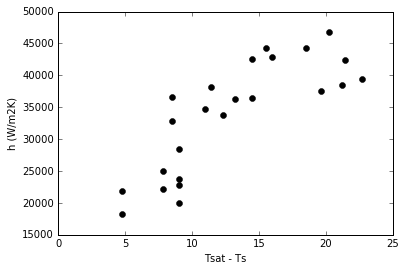

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(dT, htc, 'ko')
plt.xlabel('Tsat - Ts')
plt.ylabel('h (W/m2K)')

<p style="color:#4799ff;">EXERCISE 3.6</p>
* Repeat the analysis for filmwise condensation
* Plot its heat transfer coefficient
* Look at the two plots and comment on the differences between the plots!

[[  0.1    34.5    37.7    71.3    38.   ]
 [  0.2    34.3    35.     70.5    36.   ]
 [  0.3    34.1    35.     71.2    35.35 ]
 [  0.4    34.     36.     70.7    40.   ]
 [  0.5    34.     36.     71.     45.   ]
 [  0.6    34.     38.     70.9    48.   ]
 [  0.5    31.9    34.     66.9    49.   ]
 [  0.2    34.3    34.6    70.4    34.946]
 [  0.3    34.6    34.9    70.8    35.249]
 [  0.4    34.7    34.9    71.6    35.249]
 [  0.5    34.6    34.8    70.8    35.148]
 [  0.6    34.7    34.9    71.4    35.249]
 [  0.1    31.5    44.1    67.3    54.   ]
 [  0.2    31.3    36.6    68.8    39.3  ]
 [  0.3    31.3    40.7    71.8    62.1  ]
 [  0.4    31.4    40.5    71.9    65.   ]
 [  0.5    31.4    38.9    71.9    63.3  ]
 [  0.6    31.6    38.     71.9    60.2  ]
 [  0.7    31.6    37.9    71.9    62.5  ]]


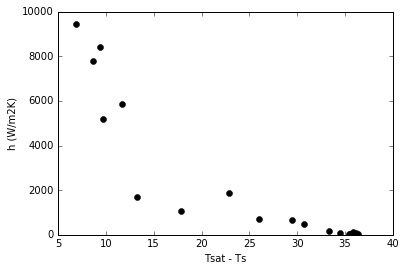

In [14]:
# Final solution for Film Condensation
filmList = glob.glob('./condensationDataFiles/film*.dat')

filmData = np.empty((0,5))

for file in filmList:
    newData = np.loadtxt(file,skiprows=1)
    filmData = np.append(filmData, newData, axis=0)
    
print(filmData)

Qdot = filmData[:,0]/60*4186*(filmData[:,2] - filmData[:,1])
qdot = Qdot/(area)
dT = filmData[:,3] - filmData[:,4]

#log mean temperature difference
#note the use of a different back slash which breaks the command across 2-lines

htc = qdot/dT
plt.plot(dT, htc, 'ko')
plt.xlabel('Tsat - Ts')
plt.ylabel('h (W/m2K)')

#### Discussion
In film condensation, a film layer is produced which flows downwards under gravitational force. It is this film of liquid between the surface and the vapor that produce the main resistance of heat transfer.

Dropwise condensation occurs when droplets form on the surface, and through merging with other bubbles can grow in size until it is sufficiently large to overcome surface tension forces and slides downwards under graviational forces. The large void regions providing direct heat transfer contact between surface and vapour, is ideal for heat exchange since it produces much higher heat transfer rates than film condensation. Unfortunately maintaining dropwise condensation is difficult because of the bubbles' propensity to grow in size and eventually flow together forming a film layer.